# 로지스틱 회귀
: 선행 방정식을 이용해서 회귀한 단어가 있지만 실제적으로 분류(classification)에 대한 확률을 계산하는 모델


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
fish = pd.read_csv("../Data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# target으로 사용될 Species의 종류 알아보기 
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# feature와 target Data 정리하기

In [5]:
import numpy as np

In [9]:
# feature data
# array로 
fish_input = fish[['Weight',"Length","Diagonal","Height","Width"]].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [11]:
# target data
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

### train과 test 분리하기 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_input,test_input,train_target,test_target = train_test_split(
    fish_input,fish_target,random_state = 42
)

: 각 컬럼별 데이터 크기가 너무 차이 난다 
=> 표준화

In [17]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [18]:
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

In [19]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

---
### knn을 이용한 확률 예측

In [21]:
from sklearn.neighbors import  KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

print("train score : ",kn.score(train_scaled,train_target))
print("test score : ",kn.score(test_scaled,test_target))

train score :  0.8907563025210085
test score :  0.875


In [22]:
# kn의 분류 정보보기 
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [23]:
# test data 
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [24]:
# test data의 확률 예측값 보기 
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4) # 소수점 이하 4자리로 정리 

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.3333, 0.    , 0.    , 0.6667, 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

> 첫번째 줄에 1은 Perch라고 100퍼센트 예측 
> 두번째 줄에 0.6667은 Smelt라 예측 
> 3가지로 나누어 확률 계산 

In [28]:
# test data의 3번째에 대한 이웃들을 알아보기 
distance, indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[115, 104,  23]])

In [29]:
train_target[indexes]
# Perch라 예측

array([['Perch', 'Roach', 'Perch']], dtype=object)

> KNN은 이웃의 갯수를 정하는 모델이다

> 현재 이웃의 갯수를 3으로 하였기 때문에 확률로 나올 수 있는 경우의 수는 3가지 (1/3,2/3,3/3)이다.


---
# 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하느 모델임
- 선형 회귀식에서 출발하였고 딥러닝 모델의 기반임.

기본적으로 위의 데이터를 보면<br>
z = a * 무게 + b * 길이 + c * 대각선 + d * 높이 + e* 두께 + f 로 구성됨<br>
위의 z식을 이용하면 나오는 결과값은 -무한대 ~ +무한대의 범위로 결과값이 출력된다.<br>
이를 해결하는 방법이 sigmoid 함수를 사용한다.<br>
sigmoid 함수는 결과값이 0~1.0 사이의 수만 출력하므로 0.5를 기준으로 양성클래스(1), 음성클래스(0)를 분류한다.<br>
로지스틱 회귀를 사용할 경우에는 이 sigmoid 함수를 로지스틱 함수라고 표현한다.

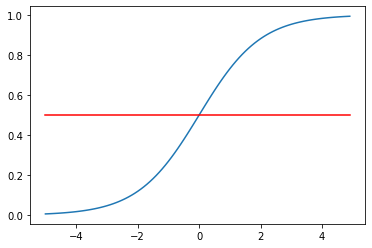

In [34]:
# Sigmoid Graph 출력
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
y = np.full((100,1),0.5)
# 0.5를 100행 1열을 만든다.
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.plot(z,y,c="r")
plt.show()



> 실직적으로 x의 값이 0 이상(y=0.5이상)이면 양성클래스로, 0이하이면 음성클래스로 분류하여 이를 이용하는 것이 predict함수이며<br>
> (y를 기준으로)
> 각각의 확률수치를 알아보는 것이 predict_proba 함수이다.

> sigmoid 함수로 시각화를 적용한 뒤 predict 함수를 적용하여 predict_proba의 확률은 본다 

---
### 로지스틱 회귀로 이진분류 수행하기 

In [38]:
# 2종류의 데이터만 발췌하기 
bream_smelt_indexed = (train_target == "Bream" ) |  (train_target == "Smelt" )
# 표준화 적용 
train_bream_smelt = train_scaled[bream_smelt_indexed]
target_bream_smelt = train_target[bream_smelt_indexed]
print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [39]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [40]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [44]:
# 예측 순서 보기 
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [43]:
#  확률값으로 보기 
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [46]:
# 회귀식의 기울기(가중치: weight) 
print(lr.coef_)
# 회귀식의 절편(bias)
# list 형태로 출력되서 여러개의 절편으로 나올 수 있다 
print(lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]
[-2.16155132]


In [48]:
# 다중식으로 계산 
# 공식에서의 y값
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [51]:
# sigmoid 함수에 대입하여 확률값을 구성한다.
from scipy.special import expit
print(expit(decision))  
# 1의 값 = bream 
# expit(decision)는 양성클래스를 기준으로 출력한다
print(1- expit(decision))
# 0의 값 =smelt 

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[0.99759855 0.02735183 0.99486072 0.98584202 0.99767269]


array[1] = bream 의 값 출력 <br>
array[0] = smelt의 값 출력 

>array([[0.99759855, 0.00240145], <br>
       [0.02735183, 0.97264817],<br>
       [0.99486072, 0.00513928],<br>
       [0.98584202, 0.01415798],<br>
       [0.99767269, 0.00232731]])<br>

---
### 로지스틱 회귀로 다중 분류 수행하기 


In [65]:
lr = LogisticRegression(C = 20, max_iter=100)
# C: 규제(릿지규제)값이며 기본은 1이다. 적은 수가 강한 규제 의미이다.
# max_iter : 반복횟수, 모델의 정확성을 유지하기 위해 반복작업을 실시, 기본값은 100 
lr.fit(train_scaled,train_target)
print("train score:",lr.score(train_scaled,train_target))
print("test score:",lr.score(test_scaled,test_target))

train score: 0.9327731092436975
test score: 0.925


In [66]:
# test data로 예측 
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [69]:
# 예측순서
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [68]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3) # decimals 소수점 3자리에서 반올림

array([[0.   , 0.013, 0.802, 0.   , 0.178, 0.003, 0.004],
       [0.   , 0.021, 0.148, 0.   , 0.054, 0.777, 0.   ],
       [0.   , 0.   , 0.049, 0.919, 0.021, 0.01 , 0.   ],
       [0.005, 0.012, 0.4  , 0.007, 0.516, 0.   , 0.061],
       [0.   , 0.   , 0.879, 0.002, 0.115, 0.001, 0.002]])

> 첫번째줄은 perch일 확률 0.802

In [73]:
# 사용된 다중 공식
# 가중치
print(lr.coef_ )
# 절편 
print(lr.intercept_)

[[-1.4905421  -1.03388688  2.5981309   7.7010905  -1.19898821]
 [ 0.19743003 -2.00430042 -3.78377532  6.50494946 -1.99725866]
 [ 3.56169555  6.34534789 -8.49297599 -5.75593302  3.79378676]
 [-0.10575561  3.60083391  3.93006894 -3.61334796 -1.75124966]
 [-1.39815543 -6.07665211  5.2587158  -0.87346372  1.86121086]
 [-1.38756983  1.49434369  1.39400626 -5.67679984 -4.40003784]
 [ 0.6228974  -2.32568608 -0.90417059  1.71350459  3.69253675]]
[-0.09382676 -0.2634882   3.24915811 -0.14626884  2.65333107 -6.78287518
  1.38396979]


> 다중회귀인 경우에는 각 샘플별(머신러닝에서 클래스)로 회귀식으로 구성하여 계산한다.<br>
> 이진분류와 같이 클래스 하나를 계산하여 나머지 클래스(classification)를 1에서 빼기를 통한 확률로는 구할 수 없어서 <br>
> 각 컬럼과 target을 일일이 계산하여야 한다. <br>


#### 샘플: 딥러닝에서는 레코드 

In [75]:
# 확률 분포 검증
# 공식에서의 y값
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-6.06  0.96  5.08 -2.93  3.58 -0.47 -0.16]
 [-9.64  2.36  4.33 -3.13  3.33  5.99 -3.25]
 [-4.06 -6.27  3.31  6.24  2.48  1.74 -3.44]
 [-1.22 -0.3   3.2  -0.88  3.45 -5.56  1.31]
 [-5.95 -1.99  5.7  -0.3   3.66 -0.8  -0.32]]


> 계산할 항목이 여러개이므로  이를 sigmoid를 사용하면 각자의 값이 생성되어 확률의 합의 1이 넘는 경우가 발생한다.
> 다중 항목인 경우에는 softmax를 사용한다.

# SoftMax 함수

In [76]:
from scipy.special import softmax

proba = softmax(decision,axis=1)  # 열의 방향 
print(np.round(proba,decimals=3))

[[0.    0.013 0.802 0.    0.178 0.003 0.004]
 [0.    0.021 0.148 0.    0.054 0.777 0.   ]
 [0.    0.    0.049 0.919 0.021 0.01  0.   ]
 [0.005 0.012 0.4   0.007 0.516 0.    0.061]
 [0.    0.    0.879 0.002 0.115 0.001 0.002]]


In [77]:
# sigmoid 함수에 대입하여 확률값을 구성한다.
from scipy.special import expit
print(expit(decision))  
# 이렇게 데이터가 둘이 아니라 둘 이상일 때는 sigmoid 를 못 씀.

[[2.32510506e-03 7.22385129e-01 9.93847747e-01 5.08170284e-02
  9.72794997e-01 3.84687241e-01 4.60301367e-01]
 [6.53446963e-05 9.13936933e-01 9.87005990e-01 4.19529781e-02
  9.65469739e-01 9.97497886e-01 3.74115974e-02]
 [1.69938531e-02 1.89273157e-03 9.64820270e-01 9.98049683e-01
  9.22527932e-01 8.50088465e-01 3.11838360e-02]
 [2.28470897e-01 4.26330318e-01 9.60712552e-01 2.92610991e-01
  9.69259386e-01 3.82833744e-03 7.87565500e-01]
 [2.59343014e-03 1.20729776e-01 9.96657752e-01 4.24760163e-01
  9.74910118e-01 3.10290278e-01 4.21186416e-01]]
